<a href="https://colab.research.google.com/github/trinade96/Fortiate_Project/blob/master/Fortiate_DST_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Trina De**

##### In this notebook, we will try to find appropriate distributions for continuous variables, instead of a point estimate here we will have a range that we can say with some confidence that our values will lie in.

In [1]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 1.9MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79979 sha256=6c93dea0a19051e69a4fe884403efd8e44e4eae32e2b694ce45a049cb01b91dd
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [2]:
!pip install coverage==3.7.1

In [3]:
!pip install pycm

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 522kB 7.4MB/s 
     |████████████████████████████████| 235kB 25.4MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.0.1 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.0.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [4]:
!pip install scikit-tda

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
  Created wheel for ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423260 sha256=11fd68c2db28ec66ae35270b2cecf0d98de11e20baba6fd522ed6495895e0c0e
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=6837039e456788fc0759ea6479e980035a3373478a4e659866b6871fb4f32b4d
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built ripser hopcroftkarp


In [5]:
!pip install kmapper

##### **Packages Used**

In [0]:
import numpy as np
import pandas as pd
import time
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.stats import spearmanr
import pycm
from pycm import *
import kmapper as km
from sklearn.cluster import DBSCAN
import sklearn
from sklearn import ensemble
from sklearn.decomposition import PCA
import warnings
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats

##### **Loading Notebook from Google Drive**

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cd /gdrive/My\ Drive/

In [10]:
missing_values = ["n/a", "na", "--", ' ', "NAN","nan","NA","NaN"]
data = pd.read_csv("/gdrive/My Drive/all_txns.csv",na_values=missing_values)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,7,22,25,27,33,39,50,51,53,59,62,72,78,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120
0,1,1100,500360265637,265637,20-JUL-18 11.34.26,20-JUL-18 11.34.26,0,0,20-JUL-18 11.34.27,3.871512e+14,NaN,?,?,?,29-MAR-16 09.02.47,01-MAR-20 00.00.00,704684,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,220.00,0.0,356,0.0,220.00,356,...,NaN,NaN,NaN,AMI,ACS,784.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,AXASK05AEVV,5.0,NaN,NaN,NaN,485855.29,NaN,NaN,NaN,0,0,NaN,NaN,NaN,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1100,500360403436,403436,20-JUL-18 11.35.39,20-JUL-18 11.35.39,0,0,20-JUL-18 11.35.39,3.871513e+14,NaN,?,?,?,03-SEP-16 19.58.40,01-SEP-20 00.00.00,704684,367123,0,40,0.0,1,0,0,9,1,0,2,0.0,0.0,0.0,1.0,0,???,42.00,0.0,356,0.0,42.00,356,...,NaN,NaN,NaN,AMI,ACS,26.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,AXASK05AEVV,5.0,NaN,NaN,NaN,117389.06,NaN,NaN,NaN,0,0,NaN,NaN,NaN,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1100,500360483836,483836,20-JUL-18 11.35.48,20-JUL-18 11.35.48,0,0,20-JUL-18 11.35.48,3.871510e+14,NaN,?,?,?,02-DEC-17 19.48.22,01-DEC-22 00.00.00,704684,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,108.32,0.0,356,0.0,108.32,356,...,NaN,NaN,NaN,AMI,ACS,917.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,AXASK05AEVV,5.0,NaN,NaN,NaN,102000.95,NaN,NaN,NaN,0,0,NaN,NaN,NaN,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1100,500360094946,94946,20-JUL-18 11.36.09,20-JUL-18 11.36.09,0,3,20-JUL-18 11.36.09,3.871510e+14,NaN,?,?,?,23-JAN-18 19.34.41,01-JAN-23 00.00.00,704684,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,173.04,0.0,356,0.0,173.04,356,...,NaN,NaN,NaN,AMI,ACS,917.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,AXASK05AEVV,5.0,NaN,NaN,NaN,59676.28,NaN,NaN,NaN,0,0,NaN,NaN,NaN,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1100,500360135131,135131,20-JUL-18 11.36.13,20-JUL-18 11.36.13,0,0,20-JUL-18 11.36.13,3.871518e+14,NaN,?,?,?,26-APR-18 19.52.38,01-APR-23 00.00.00,704684,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,241.00,0.0,356,0.0,241.00,356,...,NaN,NaN,NaN,AMI,ACS,917.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,AXASK05AEVV,5.0,NaN,NaN,NaN,50250.00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Removing completely NaN and constant columns**


In [11]:
indices1 = []
indices2 = []
start = time.time()
for col in data.columns:
  if data[col].isnull().sum() == len(data[col]):
    indices1.append(col)
  elif len(set(data[col])) == 1:
    indices2.append(col)
data=data.drop(indices1 + indices2,1)
data.shape
end = time.time()
print("Time taken to drop NaN and constant columns are:{}".format(end-start))

Time taken to drop NaN and constant columns are:69.89255166053772


##### It takes roughly about a minute to drop all the NaN and constant columns.

##### **Put column data type identifiers everywhere and for the NaNs we will convert them to a string or fixed number so that we can identify that as a category or a missing value later**

In [0]:
# Function that only checks categorical
def check_categorical(l):
   if(len(set(l))==(len(l))):
     return False
   elif(len(set(l))==1):
     return False
   else :
     return True

##### The column identifier code is twitched a bit here. Here is a column is of dtype 'float' we no longer check to see if it is categorical or not. We assume that it cannot be categorical and assign it the column identifier 'Float'.

In [13]:
column_identifiers = {}
start = time.time()
for col in data.columns:
  l = data[col][pd.notna(data[col])]
  #now we will start working with l
  
  if(l.dtype == 'O' ):
    data[col][pd.isna(data[col])] = 'unknown_Python_object'
    column_identifiers[col] = 'Categorical'
  elif(l.dtype == 'object'):
    data[col][pd.isna(data[col])] = 'unknown_object_type'
    column_identifiers[col] = 'Categorical'
  elif(l.dtype == 'int64'):
    if(check_categorical(l) == True):
      data[col][pd.isna(data[col])] = 'unknown_numeric_category'
      column_identifiers[col] = 'Categorical'
    else:
      data[col][pd.isna(data[col])] = -1
      column_identifiers[col] = 'Integer'
  elif(l.dtype == 'float'):
    # if(check_categorical(l) == True):
    #   data[col][pd.isna(data[col])] = 'unknown_float_category'
    #   column_identifiers[col] = 'Categorical'
    # else:
      data[col][pd.isna(data[col])] = -1.0
      column_identifiers[col] = 'Float'
  elif(l.dtype == 'str'):
      data[col][pd.isna(data[col])] = -'unknown_string'
      column_identifiers[col] = 'String'
end = time.time()
print("Time taken to assign column datatypes:{}".format(end-start))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: Setting

Time taken to assign column datatypes:0.7691984176635742


In [14]:
column_identifiers

{'V1': 'Integer',
 'V10': 'Float',
 'V102': 'Float',
 'V113': 'Categorical',
 'V114': 'Categorical',
 'V12': 'Categorical',
 'V13': 'Categorical',
 'V14': 'Categorical',
 'V15': 'Categorical',
 'V16': 'Categorical',
 'V18': 'Categorical',
 'V19': 'Categorical',
 'V2': 'Categorical',
 'V20': 'Categorical',
 'V21': 'Float',
 'V22': 'Categorical',
 'V23': 'Categorical',
 'V24': 'Categorical',
 'V25': 'Categorical',
 'V26': 'Categorical',
 'V27': 'Categorical',
 'V28': 'Categorical',
 'V29': 'Float',
 'V3': 'Categorical',
 'V30': 'Float',
 'V31': 'Float',
 'V32': 'Float',
 'V33': 'Categorical',
 'V34': 'Categorical',
 'V35': 'Float',
 'V36': 'Float',
 'V37': 'Categorical',
 'V38': 'Float',
 'V39': 'Float',
 'V4': 'Categorical',
 'V40': 'Categorical',
 'V41': 'Float',
 'V43': 'Float',
 'V44': 'Categorical',
 'V48': 'Float',
 'V49': 'Categorical',
 'V5': 'Categorical',
 'V50': 'Categorical',
 'V51': 'Categorical',
 'V52': 'Categorical',
 'V53': 'Float',
 'V54': 'Categorical',
 'V55': 'Catego

##### **Seperating out the columns as type 'Float', 'Integer', 'Categorical'**

In [15]:
int_list = []
flo_list = []
cat_list = []
for key in column_identifiers.keys():
  if column_identifiers[key] == 'Categorical':
    cat_list.append(key)
  elif column_identifiers[key] == 'Float':
    flo_list.append(key)
  elif column_identifiers[key] == 'Integer':
    int_list.append(key)
print(int_list)
print(flo_list)
print(cat_list)


['V1']
['V10', 'V21', 'V29', 'V30', 'V31', 'V32', 'V35', 'V36', 'V38', 'V39', 'V41', 'V43', 'V48', 'V53', 'V76', 'V77', 'V86', 'V89', 'V90', 'V98', 'V102']
['V2', 'V3', 'V4', 'V5', 'V6', 'V8', 'V9', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V33', 'V34', 'V37', 'V40', 'V44', 'V49', 'V50', 'V51', 'V52', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V66', 'V67', 'V68', 'V69', 'V70', 'V73', 'V79', 'V84', 'V85', 'V94', 'V97', 'V113', 'V114']


In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V12,V13,V14,V15,V16,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V43,V44,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V66,V67,V68,V69,V70,V73,V76,V77,V79,V84,V85,V86,V89,V90,V94,V97,V98,V102,V113,V114
0,1,1100,500360265637,265637,20-JUL-18 11.34.26,20-JUL-18 11.34.26,0,20-JUL-18 11.34.27,3.871512e+14,?,?,?,29-MAR-16 09.02.47,01-MAR-20 00.00.00,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,220.00,0.0,356,0.0,220.00,356,0.0,215.89,356,0.0,356,123456,777777,356,123456.0,777777,4722,6R00G052,9825368954,PAY U OLA CABS PG \\\122001\\,6,200267,0,4,2,4,1,0,1,1,1001,-1.0,2.0,6078503409872,AMI,ACS,784.0,0.0,0.0,0,AXASK05AEVV,5.0,485855.29,unknown_Python_object,unknown_Python_object
1,2,1100,500360403436,403436,20-JUL-18 11.35.39,20-JUL-18 11.35.39,0,20-JUL-18 11.35.39,3.871513e+14,?,?,?,03-SEP-16 19.58.40,01-SEP-20 00.00.00,367123,0,40,0.0,1,0,0,9,1,0,2,0.0,0.0,0.0,1.0,0,???,42.00,0.0,356,0.0,42.00,356,0.0,41.21,356,0.0,356,123456,777777,356,123456.0,777777,4722,6R00G052,9825393929,PAYTM.COM TRAVEL PG \\NOIDA\201310\\,6,200340,0,4,2,4,1,0,1,1,1001,-1.0,2.0,6051404919372,AMI,ACS,26.0,0.0,0.0,0,AXASK05AEVV,5.0,117389.06,unknown_Python_object,unknown_Python_object
2,3,1100,500360483836,483836,20-JUL-18 11.35.48,20-JUL-18 11.35.48,0,20-JUL-18 11.35.48,3.871510e+14,?,?,?,02-DEC-17 19.48.22,01-DEC-22 00.00.00,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,108.32,0.0,356,0.0,108.32,356,0.0,106.40,356,0.0,356,123456,777777,356,123456.0,777777,7399,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,6,200348,0,4,2,4,1,0,1,1,1001,-1.0,2.0,6039443564572,AMI,ACS,917.0,0.0,0.0,0,AXASK05AEVV,5.0,102000.95,unknown_Python_object,unknown_Python_object
3,4,1100,500360094946,94946,20-JUL-18 11.36.09,20-JUL-18 11.36.09,3,20-JUL-18 11.36.09,3.871510e+14,?,?,?,23-JAN-18 19.34.41,01-JAN-23 00.00.00,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,173.04,0.0,356,0.0,173.04,356,0.0,169.98,356,0.0,356,123456,777777,356,123456.0,777777,7399,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,6,500370,0,4,2,4,1,0,1,1,1001,-1.0,2.0,6039440900571,AMI,ACS,917.0,0.0,0.0,0,AXASK05AEVV,5.0,59676.28,unknown_Python_object,unknown_Python_object
4,5,1100,500360135131,135131,20-JUL-18 11.36.13,20-JUL-18 11.36.13,0,20-JUL-18 11.36.13,3.871518e+14,?,?,?,26-APR-18 19.52.38,01-APR-23 00.00.00,367123,0,40,0.0,1,0,0,9,4,0,2,0.0,0.0,0.0,1.0,0,???,241.00,0.0,356,0.0,241.00,356,0.0,236.73,356,0.0,356,123456,777777,356,123456.0,777777,7399,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,6,400374,0,4,2,4,1,0,1,1,1001,-1.0,2.0,6039450425576,AMI,ACS,917.0,0.0,0.0,0,AXASK05AEVV,5.0,50250.00,unknown_Python_object,unknown_Python_object


##### We will drop columns 'V5' , 'V6', 'V9',  'V15', 'V16' from the categorical list because those are date columns which we will deal with differently.


In [17]:
remove = ['V5','V6','V9','V15','V16']
for i in remove:
  cat_list = list(filter(lambda a: a != i, cat_list))
cat_list

['V2',
 'V3',
 'V4',
 'V8',
 'V12',
 'V13',
 'V14',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V33',
 'V34',
 'V37',
 'V40',
 'V44',
 'V49',
 'V50',
 'V51',
 'V52',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V73',
 'V79',
 'V84',
 'V85',
 'V94',
 'V97',
 'V113',
 'V114']

##### This notebook is same as Fortiate_DST_5(all_txns.csv) upto this point. After this is where we digress, we will try out a few distributions to fit the continuous columns.
##### We will now proceed to fit models using different distributions:
> Categorical vs. Continuous




##### **Empirical CDF**

##### First we will filter out corresponding to one particular category of a categorical variable. Then we will try and fit distributions to the values of the continuous variable corresponding to that category.

In [0]:
def cumf(x):
    sorted_x = sorted(x)
    ecdf = []
    for i in x:
        count = 0
        for j in sorted_x:
            if j <= i:
                count += 1
        ecdf.append(count/len(x))
    return ecdf    

##### What is returned from the function cumf is the ECDF of the column x


##### Here we will again use the concept of Long Nominal and Short Nominal to divide up the Categorical Columns

##### We should now divide up the categorical into LN(Long Nominal) and SN(Short Nominal)

In [19]:
categorical_type = {}
for c in cat_list:
  if(len(set(data[c]))>40):
    categorical_type[c] = 'LN'
  else:
    categorical_type[c] = 'SN'
print(categorical_type)

{'V2': 'SN', 'V3': 'LN', 'V4': 'LN', 'V8': 'SN', 'V12': 'SN', 'V13': 'SN', 'V14': 'SN', 'V18': 'SN', 'V19': 'SN', 'V20': 'SN', 'V22': 'SN', 'V23': 'SN', 'V24': 'SN', 'V25': 'SN', 'V26': 'SN', 'V27': 'SN', 'V28': 'SN', 'V33': 'SN', 'V34': 'SN', 'V37': 'LN', 'V40': 'SN', 'V44': 'SN', 'V49': 'LN', 'V50': 'LN', 'V51': 'SN', 'V52': 'LN', 'V54': 'SN', 'V55': 'LN', 'V56': 'LN', 'V57': 'LN', 'V58': 'LN', 'V59': 'SN', 'V60': 'LN', 'V61': 'SN', 'V62': 'SN', 'V63': 'SN', 'V66': 'SN', 'V67': 'SN', 'V68': 'SN', 'V69': 'SN', 'V70': 'SN', 'V73': 'SN', 'V79': 'LN', 'V84': 'SN', 'V85': 'SN', 'V94': 'SN', 'V97': 'LN', 'V113': 'SN', 'V114': 'SN'}


##### We will choose one of the Short Nominal Variables to filter our dataframe by and then apply ECDF to it.

In [0]:
## Function that takes a category from a categorical column and returns the dataframe filtered according to it
def df_filtered(df,col1,col2,val): # Here col1 refers to the categorical column and col2 refers to the continuous column that we will be fitting an empirical cdf to
## val refers to the values of the categorical column col1 that we are filtering by
  df_temp = df[df[col1] == val][[col1,col2]]
  return df_temp

In [0]:
## Setting as defaults
col1 = 'V2'
col2 = 'V10'
val = 1100

In [22]:
df_filtered(data,'V2','V10',1100)

,V2,V10
0,1100,3.871512e+14
1,1100,3.871513e+14
2,1100,3.871510e+14
3,1100,3.871510e+14
4,1100,3.871518e+14
...,...,...
2558,1100,3.871517e+14
2559,1100,3.871512e+14
2560,1100,3.871512e+14
2561,1100,3.871511e+14


In [23]:
df_extracted = df_filtered(data,'V2','V10',1100)
df_extracted['ecdf'] = cumf(list(df_extracted['V10']))
df_extracted.head()

,V2,V10,ecdf
0,1100,3.871512e+14,0.596024
1,1100,3.871513e+14,0.721670
2,1100,3.871510e+14,0.043738
3,1100,3.871510e+14,0.278330
4,1100,3.871518e+14,0.958250


##### So our outliers will be those for which the ECDF suggests that they lie outside the 95 percent confidence interval of the distribution based on the fitted distribution.

In [0]:
# def outliers_ecdf(ys):
#     # quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     # iqr = quartile_3 - quartile_1
#     # lower_bound = quartile_1 - (iqr * 1.5)
#     # upper_bound = quartile_3 + (iqr * 1.5)
#     upper_bound = 0.975
#     lower_bound = 0.025
#     #return np.where((ys > upper_bound) | (ys < lower_bound))
#     return np.where((ys>upper_bound)),np.where((ys<lower_bound))


In [0]:
# outliers_ecdf(df_extracted['ecdf'])

##### In the following piece of code we will find the cutoffs on the upper and lower side to look out for when looking at this continuous variable for this particular category. Keep in mind that there will be changes to this value as more and more data is seen and more accurate ideas about the actual distribution develops.

In [0]:
# upper_cutoff = np.min(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[0][0]])
# lower_cutoff = np.max(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[1][0]])


##### Here we are trying another method to arrive at the same result

In [0]:
lower_cutoff = max(df_extracted[df_extracted['ecdf']<0.025][col2])

In [0]:
upper_cutoff = min(df_extracted[df_extracted['ecdf']>0.975][col2])

In [0]:
#df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[0][0]]

In [82]:
## Here we take minimum of those crossing the upper bound and maximum of those crossing the lower bound as warning limits to check in the future
print("Check if values of {} corresponding to {} in {} are greater than: {}".format(col2,val,col1,upper_cutoff))
print("Check if values of {} corresponding to {} in {} are lesser than: {}".format(col2,val,col1,lower_cutoff))

Check if values of V10 corresponding to 1100 in V2 are greater than: 387151815932754.0
Check if values of V10 corresponding to 1100 in V2 are lesser than: 387151006801760.0


### **Fitting some standard distributions to find if any of them fits**

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


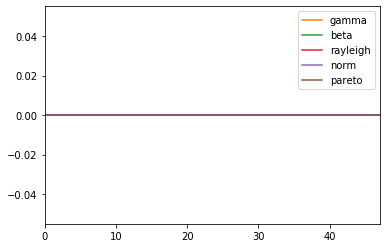

In [83]:
x = scipy.arange(len(df_extracted[col2]))
y = df_extracted[col2]
size = len(df_extracted[col2])
h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

##### The fitting is obviously bad here. Maybe we need to consider more distributions here

In [0]:
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
len(y)

2515

##### **Second fitting method as judged by SSE**

In [0]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [0]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
         st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine]
    # ,
    #     st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    #     st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    #     st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    #     st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    #     st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    #     st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    #     st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    #     st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    #     st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    # ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [0]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [0]:
# Load data from statsmodels datasets
data  = df_extracted[col2]
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


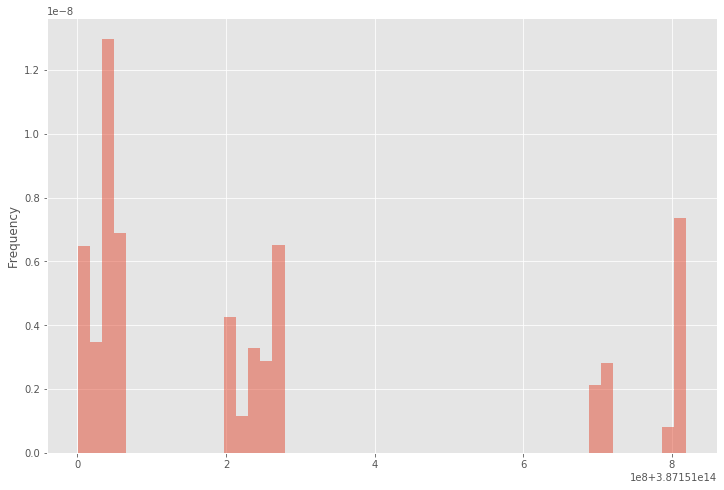

In [0]:
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5) #, #color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

In [0]:
# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

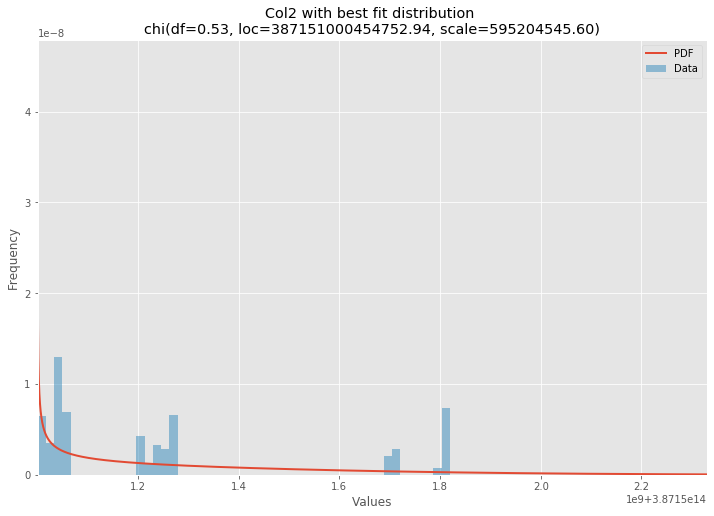

In [0]:


# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Col2 with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Values')
ax.set_ylabel('Frequency')

##### We can gradually keep adding more and more distributions from the list called DISTRIBUTIONS above to find out which distributions provide a better fit and the number of distributions it is feasible for us to check within a reasonable amount of time.

##### Out of the distributions we had currently, the Chi distribution seems to have fitted it the best.


### **ROUGH WORK**

In [0]:
np.min(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[0][0]])

387151007327755.0

In [0]:
sorted(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[0][0]])

[387151007327755.0,
 387151008330758.0,
 387151008609755.0,
 387151010546755.0,
 387151013254752.0,
 387151017061758.0,
 387151017330757.0,
 387151021064755.0,
 387151042250756.0,
 387151043293771.0,
 387151043408759.0,
 387151044578758.0,
 387151045400754.0,
 387151045933754.0,
 387151047098752.0,
 387151047287753.0,
 387151047809754.0,
 387151049001756.0,
 387151049329761.0,
 387151051122755.0,
 387151052594761.0,
 387151053682756.0,
 387151054895761.0,
 387151055683752.0,
 387151204221761.0,
 387151268516757.0,
 387151274214760.0,
 387151706359752.0,
 387151706803759.0,
 387151706861757.0,
 387151805557761.0,
 387151811888770.0,
 387151814823756.0,
 387151816039757.0,
 387151816200755.0,
 387151816439759.0,
 387151817109757.0,
 387151817138756.0,
 387151817193759.0,
 387151817425757.0,
 387151817505756.0,
 387151817857761.0,
 387151818104756.0,
 387151818271754.0,
 387151818492753.0,
 387151818546759.0,
 387151818546759.0,
 387151818748761.0,
 387151818824759.0,
 387151818824759.0,


In [0]:
sorted(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[1][0]])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


[387151000454753.0,
 387151000458755.0,
 387151001731762.0,
 387151003998763.0,
 387151003998763.0,
 387151004235961.0,
 387151004362763.0,
 387151005428771.0,
 387151005428771.0,
 387151005656759.0,
 387151005656759.0,
 387151005695755.0,
 387151005703759.0,
 387151005711752.0,
 387151005711752.0,
 387151005810752.0,
 387151005810752.0,
 387151005817757.0,
 387151005924760.0,
 387151005930758.0,
 387151005938761.0,
 387151005974755.0,
 387151005974755.0,
 387151005974755.0,
 387151005974755.0,
 387151005977759.0,
 387151005992756.0,
 387151005998753.0,
 387151005998753.0,
 387151006097753.0,
 387151006185758.0,
 387151006185758.0,
 387151006211770.0,
 387151006278761.0,
 387151006301761.0,
 387151006337755.0,
 387151006443761.0,
 387151006615754.0,
 387151006630753.0,
 387151006630753.0,
 387151006644969.0,
 387151006644969.0,
 387151006644969.0,
 387151006801760.0,
 387151041662753.0,
 387151047434760.0,
 387151047623759.0,
 387151048642758.0,
 387151052978759.0,
 387151053791753.0,


In [0]:
set(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[1][0]]).intersection(df_extracted[col2][outliers_ecdf(df_extracted['ecdf'])[0][0]])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


set()

In [0]:
## Function to find largest/smallest value lesser/greater than a given value in a sorted list of all distinct values
def find_next_smallest(x,v):
  if(len(x)==1):
    return x[0]
  else:
    if(x[int(len(x)/2)]==v):
      return x[int(len(x)/2)-1]
    elif(x[int(len(x)/2)]>v):
      find_next_smallest(x[:int(len(x)/2)],v)
    else:
      find_next_smallest(x[int(len(x)/2):],v)


In [0]:
[1,2,3,4,5][:1]

[1]

In [0]:
find_next_smallest([1,2,3,4,5,6],)

In [70]:
l = np.arange(1,50,1)
l[np.where(l>10)]
l[np.where(l<8)]
# l2 = cumf(l)
# print(l[np.where(l2>0.975)])
# print(l[np.where(l2<0.025)])

array([1, 2, 3, 4, 5, 6, 7])